In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize


In [ ]:
data = pd.read_csv('/content/preprocessed.csv')
data.head()

,Price,Created_date,Phone,Engine,Gearbox,Mileage,Year,Color,Body_type,Fuel_type,Air_condition,Drive_type,Condition,Model,Location
0,600000,03-07-2021,+880130 250 1001,6,AUTOMATIC,71414,2004,SILVER,4 WHEEL DRIVES & SUVS,OTHER,YES,RIGHT,USED,TOYOTA PROBOX,DHAKA
1,460000,10-07-2021,+880130 250 1001,6,AUTOMATIC,68000,2004,GOLD,SALOON,OTHER,YES,RIGHT,USED,NISSAN SUNNY,DHAKA
2,200000,23-09-2021,+880130 250 1001,6,AUTOMATIC,20000,1998,GOLD,4 WHEEL DRIVES & SUVS,OTHER,YES,RIGHT,USED,TOYOTA CORONA,DHAKA
3,285,29-09-2021,+880130 250 1001,6,MANUAL,73611,2007,BLACK,VAN,OTHER,YES,RIGHT,USED,HYUNDAI H1,DHAKA
4,53000,29-09-2021,+880130 250 1001,6,MANUAL,73611,2013,BLUE,SEDAN,LPG,YES,RIGHT,USED,NISSAN SUNNY,DHAKA


In [ ]:
def location(df):
  for i in range(len(df)):
    if df['Location'][i] == "DHAKA":
      df['Location'][i] = 1
    else:
      df['Location'][i] = 0
def body(df):
  for i in range(len(df)):
    if df['Body_type'][i] == "SEDAN":
      df['Body_type'][i] = 1
    else:
      df['Body_type'][i] = 0
def fuel(df):
  for i in range(len(df)):
    if df['Fuel_type'][i] == "PETROL":
        df['Fuel_type'][i] = 1
    else:
      df['Fuel_type'][i] = 0

def sedan(df):
  df['sedan'] = [0]*len(df)
  for i in range(len(df)):
    if df['Body_type'][i] == "SEDAN":
      df['sedan'][i] = 1
    else:
      df['sedan'][i] = 0

def suv(df):
  df['suv'] = [0]*len(df)
  for i in range(len(df)):
    if df['Body_type'][i] == "SUV" or df['Body_type'][i] == "4 WHEEL DRIVES & SUVS":
      df['suv'][i] = 1
    else:
      df['suv'][i] = 0

def petrol(df):
  df['petrol'] = [0]*len(df)
  for i in range(len(df)):
    if df['Fuel_type'][i] == "PETROL":
      df['petrol'][i] = 1
    else:
      df['petrol'][i] = 0

def gas(df):
  df['gas'] = [0]*len(df)
  for i in range(len(df)):
    if df['Fuel_type'][i] == "GAS":
      df['gas'][i] = 1
    else:
      df['gas'][i] = 0

In [ ]:
# numeric = ['Price','Engine','Mileage','Year','Location','Body_type']
df = data
sedan(df)
suv(df)
location(df)
petrol(df)
gas(df)
body(df)
fuel(df)
df.head()

In [ ]:

df.head()

In [ ]:
df['Mileage'] = np.log(df['Mileage'])
df['Engine'] = normalize(df[['Engine']])
df['Year'] = np.log(df['Year'])
X = df[['Mileage','Year','Engine','Location','sedan','suv']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
r_squire

In [ ]:
X = df.drop(['Price','Year'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
r_squire

0.024337296988566126

In [ ]:
X = df.drop(['Price','Engine'], axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
r_squire

0.21669456904507112

In [ ]:
X = df.drop('Price', axis=1)
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
r_squire

0.21369584147798337

YEAR

2377


0.2062933987730171

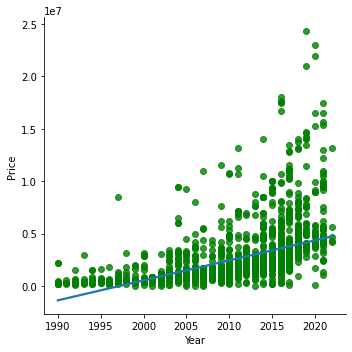

In [ ]:
col = 'Year'
df = df
sns.lmplot(x = col, y = 'Price', data = df, scatter_kws = {'color':'green'}, ci = False)
X = df[[col]]
y = df['Price']
print(len(df))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
r_squire

total: 2050
coef: [141575.00439823]
intercept: -282523556.69893295
r_squire: 0.406352030034688


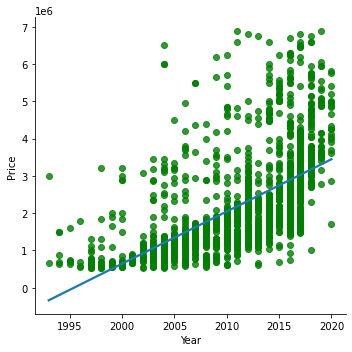

In [ ]:
col = 'Year'
df_filtered = df.copy()
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)
df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]
# print(q_low,q_hi,len(df_filtered))

col2 = 'Price'
q_low = df_filtered[col2].quantile(0.05)
q_hi  = df_filtered[col2].quantile(0.95)
df_filtered = df_filtered[(df_filtered[col2] < q_hi) & (df_filtered[col2] > q_low)]
# print(q_low,q_hi,len(df_filtered))


sns.lmplot(x = col, y = 'Price', data = df_filtered, scatter_kws = {'color':'green'}, ci = False)
X = df_filtered[[col]]

y = df_filtered['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
# r_squire
print('total:',len(df_filtered))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2050
coef: [2.16255953e+09]
intercept: -4385623120.853318
r_squire: 0.40564306361688685


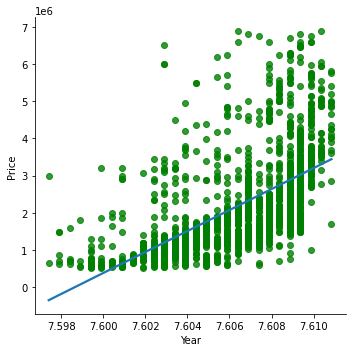

In [ ]:
col = 'Year'
f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = f(df_filtered2[col])
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2050
coef: [1.42177452e+08]
intercept: -2160728744.924483
r_squire: 0.40572559584641865


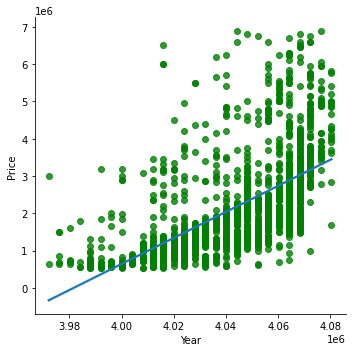

In [ ]:
col = 'Year'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],2)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2050
coef: [5.68709809e+08]
intercept: -2160728744.9244657
r_squire: 0.4057255958463888


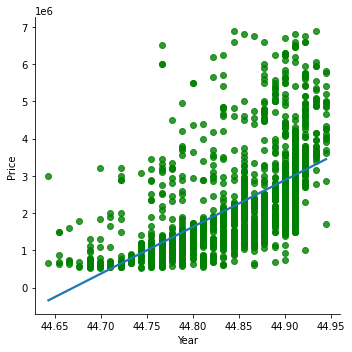

In [ ]:
col = 'Year'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],1./2)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2050
coef: [8.53064713e+08]
intercept: -2160728744.9245486
r_squire: 0.40572559584636203


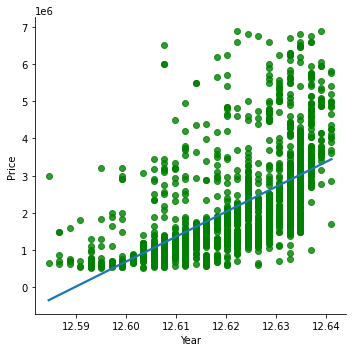

In [ ]:
col = 'Year'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],1./3)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

ENGINE

2377


-0.0010188305751772653

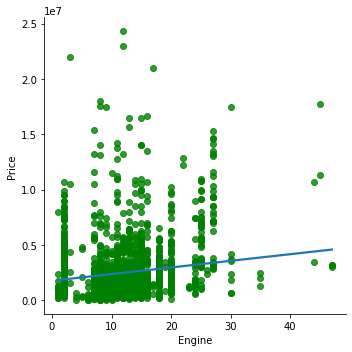

In [ ]:
col = 'Engine'
df = df
sns.lmplot(x = col, y = 'Price', data = df, scatter_kws = {'color':'green'}, ci = False)
X = df[[col]]
y = df['Price']
print(len(df))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
r_squire


total: 1942
coef: [50457.16193006]
intercept: 1357794.5131985825
r_squire: 0.011283317115088343


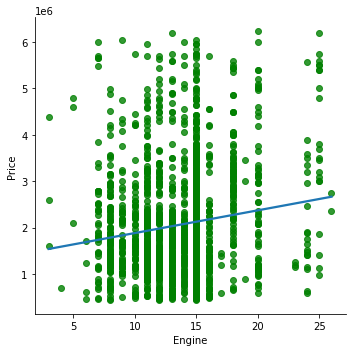

In [ ]:
col = 'Engine'
df_filtered = df.copy()
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)
df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]
# print(q_low,q_hi,len(df_filtered))

col2 = 'Price'
q_low = df_filtered[col2].quantile(0.05)
q_hi  = df_filtered[col2].quantile(0.95)
df_filtered = df_filtered[(df_filtered[col2] < q_hi) & (df_filtered[col2] > q_low)]
# print(q_low,q_hi,len(df_filtered))


sns.lmplot(x = col, y = 'Price', data = df_filtered, scatter_kws = {'color':'green'}, ci = False)
X = df_filtered[[col]]

y = df_filtered['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
# r_squire
print('total:',len(df_filtered))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1942
coef: [1010464.84125517]
intercept: 1093917.130621079
r_squire: 9.805821970232387e-05


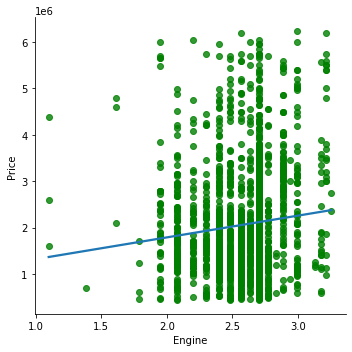

In [ ]:
col = 'Engine'
f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = f(df_filtered2[col])
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1942
coef: [248443.07411633]
intercept: 763920.3842301648
r_squire: 0.002452355299819464


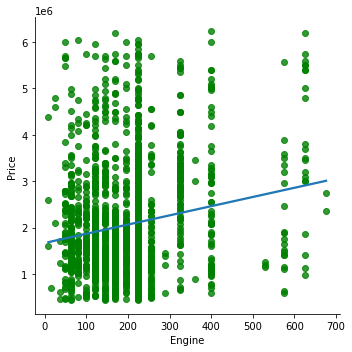

In [ ]:
col = 'Engine'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],2)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1942
coef: [993772.29646532]
intercept: 763920.3842301641
r_squire: 0.002452355299819353


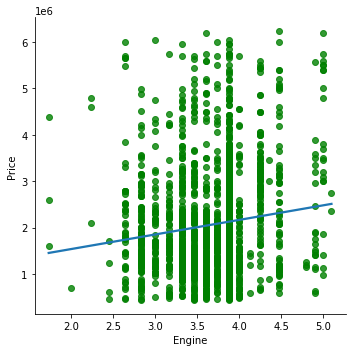

In [ ]:
col = 'Engine'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],1./2)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1942
coef: [1490658.44469798]
intercept: 763920.3842301639
r_squire: 0.002452355299819353


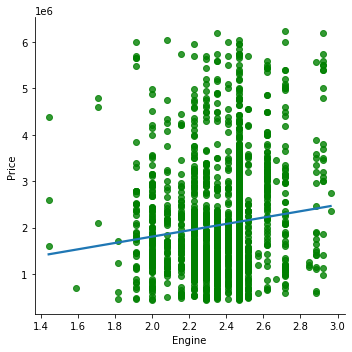

In [ ]:
col = 'Engine'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],1./3)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

MILEAGE

2377


0.027489739584766304

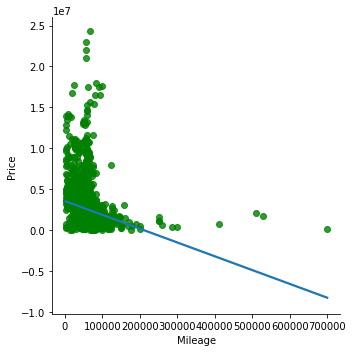

In [ ]:
col = 'Mileage'
df = df
sns.lmplot(x = col, y = 'Price', data = df, scatter_kws = {'color':'green'}, ci = False)
X = df[[col]]
y = df['Price']
print(len(df))
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
r_squire

total: 2093
coef: [-23.84842113]
intercept: 3565047.0472852914
r_squire: 0.11413021100484988


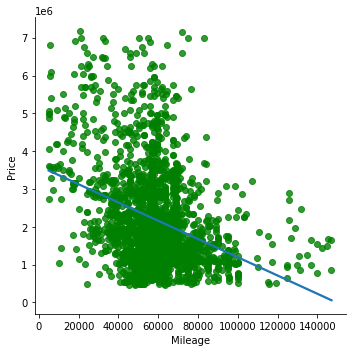

In [ ]:
col = 'Mileage'
df_filtered = df.copy()
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)
df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]
# print(q_low,q_hi,len(df_filtered))

col2 = 'Price'
q_low = df_filtered[col2].quantile(0.05)
q_hi  = df_filtered[col2].quantile(0.95)
df_filtered = df_filtered[(df_filtered[col2] < q_hi) & (df_filtered[col2] > q_low)]
# print(q_low,q_hi,len(df_filtered))


sns.lmplot(x = col, y = 'Price', data = df_filtered, scatter_kws = {'color':'green'}, ci = False)
X = df_filtered[[col]]

y = df_filtered['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
# r_squire
print('total:',len(df_filtered))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2093
coef: [-12683502.67107194]
intercept: 32475239.409500256
r_squire: 0.1384149575064143


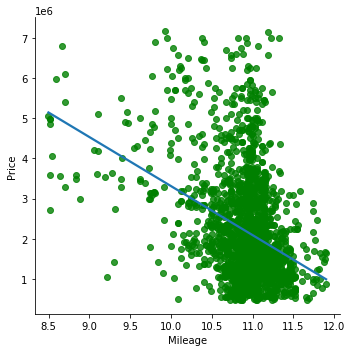

In [ ]:
col = 'Mileage'
f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = f(df_filtered2[col])
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2093
coef: [-610114.9946218]
intercept: 15486962.310960794
r_squire: 0.13951460747461641


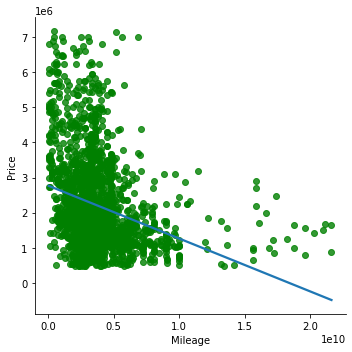

In [ ]:
col = 'Mileage'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],2)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2093
coef: [-2440459.97848718]
intercept: 15486962.310960794
r_squire: 0.1395146074746163


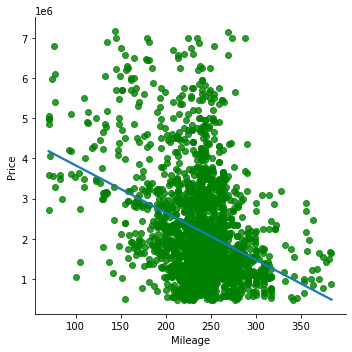

In [ ]:
col = 'Mileage'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],1./2)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2093
coef: [-3660689.96773078]
intercept: 15486962.310960798
r_squire: 0.13951460747461608


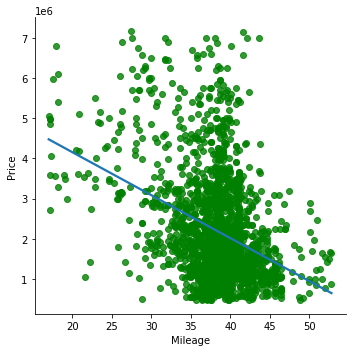

In [ ]:
col = 'Mileage'
# f = np.log
df_filtered2 = df_filtered.copy()
df_filtered2[col] = np.power(df_filtered2[col],1./3)
sns.lmplot(x = col, y = 'Price', data = df_filtered2, scatter_kws = {'color':'green'}, ci = False)


X = f(df_filtered2[[col]])
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

Plain Data

In [ ]:
# by only numerical
df_filtered2 = df.copy()
X = df_filtered2[['Engine','Year','Mileage']]
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2377
coef: [ 6.52866502e+04  1.84937253e+05 -7.27225352e+00]
intercept: -369716741.43309397
r_squire: 0.21392484690152969


In [ ]:
# numeric with categorical
# adding categorical 
df_filtered2 = df.copy()
# ['Engine','Year','Mileage','Body_type','sedan','suv','petrol','Location']
# X = df_filtered2[['Engine','Year','Mileage','sedan','suv']]
X = df_filtered2[['Engine','Year','Mileage','Body_type','Fuel_type','Location']]
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 2377
coef: [ 6.69801279e+04  1.66951174e+05 -6.43708942e+00 -8.26899617e+05
  4.94138380e+05  6.07934737e+05]
intercept: -334032148.0711859
r_squire: 0.26536510160408844


Modified Data

In [ ]:
col = 'Year'
df_filtered = df.copy()
q_low = df[col].quantile(0.01)
q_hi  = df[col].quantile(0.99)
df_filtered = df[(df[col] < q_hi) & (df[col] > q_low)]
# print(q_low,q_hi,len(df_filtered))
len(df_filtered)

2286

In [ ]:
col2 = 'Engine'
q_low = df_filtered[col2].quantile(0.01)
q_hi  = df_filtered[col2].quantile(0.99)
df_filtered = df_filtered[(df_filtered[col2] < q_hi) & (df_filtered[col2] > q_low)]
len(df_filtered)

2076

In [ ]:
col2 = 'Price'
q_low = df_filtered[col2].quantile(0.05)
q_hi  = df_filtered[col2].quantile(0.95)
df_filtered = df_filtered[(df_filtered[col2] < q_hi) & (df_filtered[col2] > q_low)]
len(df_filtered)

1867

In [ ]:

col = 'Mileage'
f = np.log
df_filtered[col] = f(df_filtered[col])
len(df_filtered)

1867

In [ ]:
# by only numerical
df_filtered2 = df_filtered.copy()
X = df_filtered2[['Engine','Year','Mileage']]
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1867
coef: [  28674.06754491  121474.72867697 -450148.62970922]
intercept: -237718325.24941337
r_squire: 0.5289443484656258


In [ ]:
df_filtered.head()

,Price,Engine,Mileage,Year,Location,Body_type
0,600000,6,11.176249,2004,DHAKA,4 WHEEL DRIVES & SUVS
14,2100000,9,10.144471,2014,DHAKA,SEDAN
26,900000,7,11.002100,2004,DHAKA,SALOON
28,1125000,9,11.260417,2007,DHAKA,SALOON
29,1020000,9,11.260417,2005,DHAKA,HATCHBACK & STATION WAGONS


In [ ]:
# adding categorical 
df_filtered2 = df_filtered.copy()
# ['Engine','Year','Mileage','Body_type','sedan','suv','petrol','Location']
# X = df_filtered2[['Engine','Year','Mileage','sedan','suv']]
X = df_filtered2[['Engine','Year','Mileage','Body_type','Fuel_type','Location']]
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1867
coef: [  28352.14462167  115239.79242137 -401436.87427495 -201434.42299836
  292792.6005381   240988.37835868]
intercept: -225963116.6106759
r_squire: 0.5568125214872647


In [ ]:
# adding categorical 
df_filtered2 = df_filtered.copy()
# ['Engine','Year','Mileage','Body_type','sedan','suv','petrol','Location']
X = df_filtered2[['Engine','Year','Mileage','sedan','suv']]
# X = df_filtered2[['Engine','Year','Mileage','sedan','suv','petrol','Location']]
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1867
coef: [  20875.07489996  112471.28504863 -366859.53105397  180066.71162506
  947491.56877822]
intercept: -220681261.68077856
r_squire: 0.5899295486539714


In [ ]:
# adding categorical 
df_filtered2 = df_filtered.copy()
X = df_filtered2[['Engine','Year','Mileage','sedan','suv','petrol','Location']]
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1867
coef: [  20665.35864646  110453.23859576 -331727.59810636  145431.97912524
  900018.20119093  209711.64183891  217805.99010764]
intercept: -217284487.51488826
r_squire: 0.6049915461120949


In [ ]:
# adding categorical 
df_filtered2 = df_filtered.copy()
X = df_filtered2[['Engine','Year','Mileage','sedan','suv','petrol']]
# X = df[[col]]
y = df_filtered2['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
lr = LinearRegression()
lr.fit(X_train,y_train)
r_squire = lr.score(X_test,y_test)
print('total:',len(df_filtered2))
print('coef:',lr.coef_)
print('intercept:',lr.intercept_)
print('r_squire:',r_squire)

total: 1867
coef: [  20942.47003018  110345.39138226 -336569.86969665  146878.71260713
  901150.31994934  210931.37716406]
intercept: -216806638.84764254
r_squire: 0.6053361155709649
